In [117]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city=pd.read_csv(city_data_to_load)
ride=pd.read_csv(ride_data_to_load)
city.head()
ride.head()
# Combine the data into a single dataset
data=pd.merge(ride,city,on="city")
# Display the data table for preview
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [118]:
data_Rural=data.loc[data["type"]=="Rural"]
data_Sub=data.loc[data["type"]=="Suburban"]
data_Urban=data.loc[data["type"]=="Urban"]

In [119]:
group_rural=data_Rural.groupby(["city"])
count_rural=group_rural.count()
average_rural=group_rural.mean()

group_sub=data_Sub.groupby(["city"])
count_sub=group_sub.count()
average_sub=group_sub.mean()

group_urban=data_Urban.groupby(["city"])
count_urban=group_urban.count()
average_urban=group_urban.mean()

## Bubble Plot of Ride Sharing Data

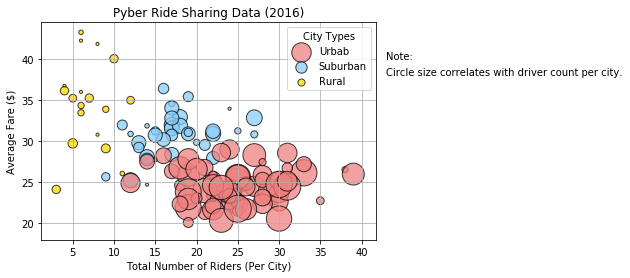

In [160]:
# Obtain the x and y coordinates for each of the three city types
x_rural=[x for x in count_rural["date"]]
y_rural=[y for y in average_rural["fare"]]
s_rural=[10*s for s in average_rural["driver_count"]]

x_sub=[x for x in count_sub["date"]]
y_sub=[y for y in average_sub["fare"]]
s_sub=[10*s for s in average_sub["driver_count"]]

x_urban=[x for x in count_urban["date"]]
y_urban=[y for y in average_urban["fare"]]
s_urban=[10*s for s in average_urban["driver_count"]]

# Build the scatter plots for each city types
Rural= plt.scatter(x_rural,y_rural,marker="o",s=s_rural,color="gold",edgecolor="black",alpha=0.75)
Suburban= plt.scatter(x_sub,y_sub,marker="o",s=s_sub,color="lightskyblue",edgecolor="black",alpha=0.75)
Urban= plt.scatter(x_urban,y_urban,marker="o",s=s_urban,color="lightcoral",edgecolor="black",alpha=0.75)
plt.grid()


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend((Urban,Suburban,Rural),("Urbab","Suburban","Rural"),title="City Types")
# Incorporate a text label regarding circle size
plt.text(43,40,"Note:")
plt.text(43,38,"Circle size correlates with driver count per city.")
# Save Figure
plt.savefig("Savefig/pyber.png")

##### Show plot
plt.show()

## Total Fares by City Type

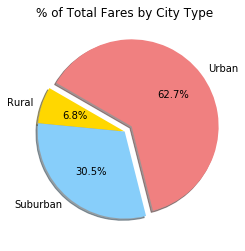

In [161]:
# Calculate Type Percents
Fares=data.groupby(["type"])
Total=Fares.sum()

Total["Percent"]=Total["fare"]/63538.6
Total
Percent=[x for x in Total["Percent"]]
labels=["Rural","Suburban","Urban"]
color=["gold","lightskyblue","lightcoral"]
explode=[0,0,0.1]


# Build Pie Chart
plt.pie(Percent,explode=explode,labels=labels,
        colors=color,autopct="%1.1f%%",shadow=True,startangle=150)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Savefig/total_fares.png")

In [139]:
# Show Figure
plt.show()

## Total Rides by City Type

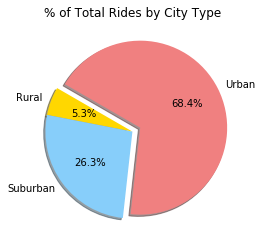

In [162]:
# Calculate Ride Percents
Count=Fares.count()
Count

Count["Percent"]=Count["city"]/2375
Percent=[x for x in Count["Percent"]]
labels=["Rural","Suburban","Urban"]
color=["gold","lightskyblue","lightcoral"]
explode=[0,0,0.1]

# Build Pie Chart
plt.pie(Percent,explode=explode,labels=labels,
        colors=color,autopct="%1.1f%%",shadow=True,startangle=150)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Savefig/total_rides.png")

In [149]:
# Show Figure
plt.show()

## Total Drivers by City Type

,fare,ride_id,driver_count,Percent,Percent_driver
type,,,,,
Rural,4327.93,580968240341287,537,0.068115,0.007816
Suburban,19356.33,3106884522576766,8570,0.304639,0.124729
Urban,39854.38,7919412664056093,59602,0.627247,0.867456


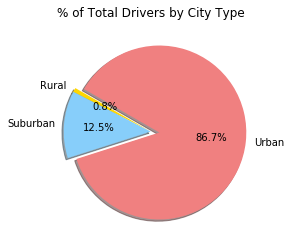

In [164]:
# Calculate Driver Percents
Total


Total["Percent_driver"]=Total["driver_count"]/68709
Percent=[x for x in Total["Percent_driver"]]
labels=["Rural","Suburban","Urban"]
color=["gold","lightskyblue","lightcoral"]
explode=[0,0,0.1]
# Build Pie Charts
plt.pie(Percent,explode=explode,labels=labels,
        colors=color,autopct="%1.1f%%",shadow=True,startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Savefig/total_dri.png")

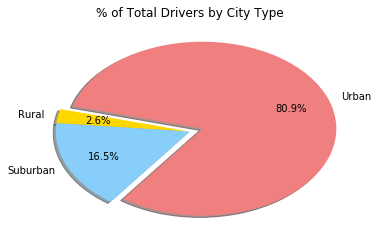

In [6]:
# Show Figure
plt.show()